In [12]:
import numpy as np
# Defined 3 points in 2D-space:
X=np.array([[2, 1, 0],
            [4, 3, 0]])

# Calculate the covariance matrix:
x_mean = np.mean(X,axis = 1,keepdims=True)
x_centered = X- x_mean

R = np.cov(x_centered)

# Calculate the SVD decomposition and new basis vectors:
[U,D,V]= np.linalg.svd(R)  # call SVD decomposition
u1=U[:,0] # new basis vector 1 (1st Principal Component)
u2=U[:,1]   # new basis vector 2 (2nd Principal Component)

# Calculate the coordinates in new orthonormal basis:

c1 = np.dot(u1,x_centered)
c2 = np.dot(u2,x_centered)

# Calculate the approximation of the original from new basis
#print(Xi1[:,None]) # add second dimention to array and test it

# Here we reconstruct using only the first principal component (rank-1 approximation)
Xi1 = np.dot(u1[:, None], c1[None, :]) + x_mean
print("Rank-1 Approximation (using only u1):\n", Xi1)

# Check that you got the original (by reconstructing with both basis vectors)
X_reconstructed = np.dot(u1[:, None], c1[None, :]) + np.dot(u2[:, None], c2[None, :]) + x_mean

print("\nOriginal X:\n", X)
print("\nFully Reconstructed X:\n", X_reconstructed)
print("\nIs the reconstruction exact?", np.allclose(X, X_reconstructed))

# Check that you got the original

Rank-1 Approximation (using only u1):
 [[ 1.8200922   1.25607376 -0.07616596]
 [ 4.08426431  2.88006147  0.03567423]]

Original X:
 [[2 1 0]
 [4 3 0]]

Fully Reconstructed X:
 [[2.00000000e+00 1.00000000e+00 1.11022302e-15]
 [4.00000000e+00 3.00000000e+00 4.44089210e-16]]

Is the reconstruction exact? True


In [13]:
# Load Iris dataset as in the last PC lab:
from sklearn.datasets import load_iris
iris=load_iris()
iris.feature_names
print(iris.feature_names) # features
print(iris.data[0:5,:]) #data
print(iris.target[:]) # labels


['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


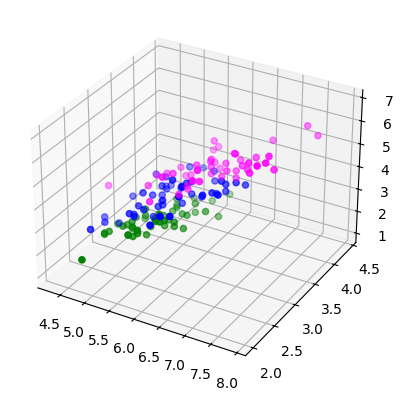

In [14]:
# We have 4 dimensions of data, plot the first three colums in 3D

X=iris.data
y=iris.target
import matplotlib.pyplot as plt

axes1=plt.axes(projection='3d')
axes1.scatter3D(X[y==0,0],X[y==0,1],X[y==0,2],color='green')
axes1.scatter3D(X[y==1,0],X[y==1,1],X[y==1,2],color='blue')
axes1.scatter3D(X[y==2,0],X[y==2,1],X[y==2,2],color='magenta')
plt.show()

[[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


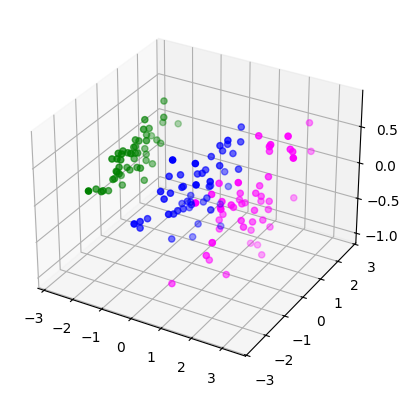

In [15]:
# Pre-processing is an important step, you can try either StandardScaler (zero mean, unit variance of features)
# or MinMaxScaler (to interval from 0 to 1)
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
Xscaler = StandardScaler()

#normalize
X_scaled=Xscaler.fit_transform(X)

# define PCA object (three components), fit and transform the data
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)
print(pca.get_covariance())

# you can plot the transformed feature space in 3D:
axes2=plt.axes(projection='3d')
axes2.scatter3D(X_pca[y==0,0],X_pca[y==0,1],X_pca[y==0,2],color='green')
axes2.scatter3D(X_pca[y==1,0],X_pca[y==1,1],X_pca[y==1,2],color='blue')
axes2.scatter3D(X_pca[y==2,0],X_pca[y==2,1],X_pca[y==2,2],color='magenta')
plt.show()

In [16]:
# Compute pca.explained_variance_ and pca.explained_cariance_ratio_values
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)


[2.93808505 0.9201649  0.14774182]
[0.72962445 0.22850762 0.03668922]


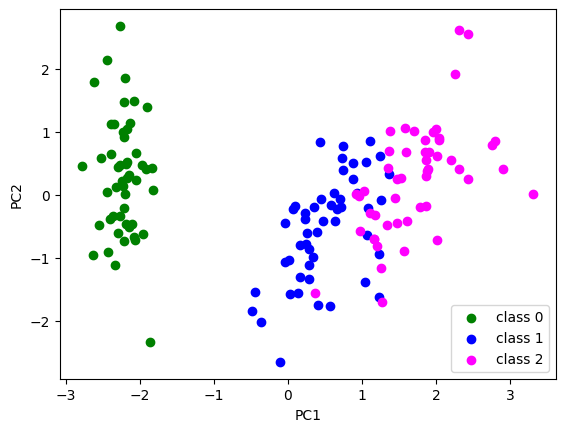

In [17]:
# Plot the principal components in 2D, mark different targets in color

plt.figure()
plt.scatter(X_pca[y==0, 0], X_pca[y==0, 1], color='green', label='class 0')
plt.scatter(X_pca[y==1, 0], X_pca[y==1, 1], color='blue', label='class 1')
plt.scatter(X_pca[y==2, 0], X_pca[y==2, 1], color='magenta', label='class 2')

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.show()

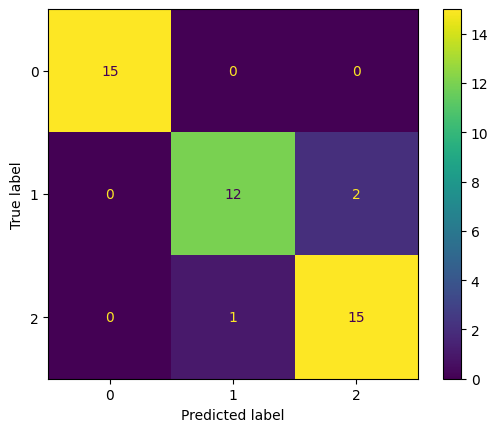

In [18]:
# Import train_test_split as in last PC lab, split X (original) into train and test, train KNN classifier on full 4-dimensional X

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

x = iris.data
y = iris.target

X_train, X_test,y_train, y_test = train_test_split(x,y,test_size=0.3)

knn1=KNeighborsClassifier(n_neighbors = 3)
knn1.fit(X_train,y_train)
Ypred=knn1.predict(X_test)

# Import and show confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_true=y_test,y_pred=Ypred)

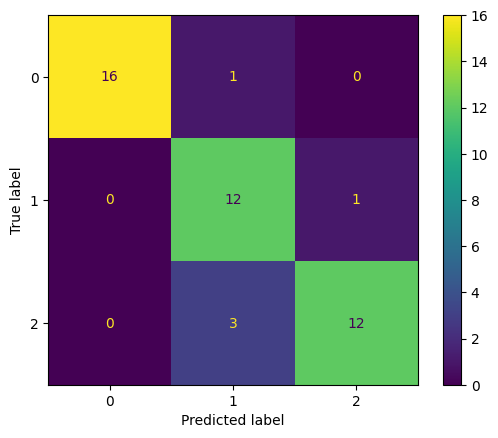

In [19]:
# Now do the same (data set split, KNN, confusion matrix), but for PCA-transformed data (1st two principal components, i.e., first two columns). 
# Compare the results with full dataset

x = iris.data
y = iris.target

Xscaler = StandardScaler()
X_scaled=Xscaler.fit_transform(x)

# define PCA object (two components), fit and transform the data
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

X_train_pca, X_test_pca,y_train_pca, y_test_pca = train_test_split(X_pca,y,test_size=0.3)

#knn model
knn1=KNeighborsClassifier(n_neighbors = 3)
knn1.fit(X_train_pca,y_train_pca)
Ypred=knn1.predict(X_test_pca)

#confusion matrix
ConfusionMatrixDisplay.from_predictions(y_true=y_test_pca,y_pred=Ypred)

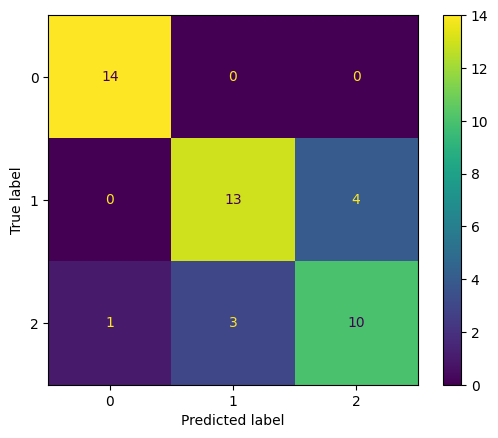

In [20]:
# Now do the same, but use only 2-dimensional data of original X (first two columns)

x = iris.data
x_2d = x[:,0:2]
y = iris.target

X_train, X_test,y_train, y_test = train_test_split(x_2d,y,test_size=0.3)

knn1=KNeighborsClassifier(n_neighbors = 3)
knn1.fit(X_train,y_train)
Ypred=knn1.predict(X_test)

# confusion matrix
ConfusionMatrixDisplay.from_predictions(y_true=y_test,y_pred=Ypred)

Conclusion : 

- Full Dataset (4D): Achieves the highest accuracy by utilizing all available information.

- PCA Transformed (2D): Maintains nearly the same accuracy as the full dataset. This proves PCA successfully compresses the most important variance (information) into fewer dimensions.

- First 2 Columns Only (2D): Yields the worst accuracy. Simply dropping the last two columns (petal dimensions) discards crucial information needed to classify the species correctly.